1.  이미지 감정 인식
https://github.com/sunsmiling/facial-emotion-detector


2. 영상 실시간 감정 인식
https://jusonn.github.io/blog/2018/02/16/real-time-emotion-detection/



출처: https://icandooit.tistory.com/95 [i can do "IT"]

# kaggle 

- (0=Angry 화남, 1=Disgust역겨움, 2=Fear두려움, 3=Happy행복, 4=Sad슬픔, 5=Surprise놀람, 6=Neutral무표정).

If you use this dataset in your research work, please cite

"Challenges in Representation Learning: A report on three machine learning
contests." I Goodfellow, D Erhan, PL Carrier, A Courville, M Mirza, B
Hamner, W Cukierski, Y Tang, DH Lee, Y Zhou, C Ramaiah, F Feng, R Li,
X Wang, D Athanasakis, J Shawe-Taylor, M Milakov, J Park, R Ionescu,
M Popescu, C Grozea, J Bergstra, J Xie, L Romaszko, B Xu, Z Chuang, and
Y. Bengio. arXiv 2013.

See fer2013.bib for a bibtex entry.


In [66]:
import pylearn


In [69]:
"""
A Pylearn2 Dataset class for accessing the data for the
facial expression recognition Kaggle contest for the ICML
2013 workshop on representation learning.
"""
__authors__ = "Ian Goodfellow"
__copyright__ = "Copyright 2013, Universite de Montreal"
__credits__ = ["Ian Goodfellow"]
__license__ = "3-clause BSD"
__maintainer__ = "LISA Lab"

import csv
import numpy as np
import os
import pylearn.datasets
from pylearn.datasets.dense_design_matrix import DefaultViewConverter
from pylearn.datasets.dense_design_matrix import DenseDesignMatrix
from pylearn.utils.string_utils import preprocess

class EmotionsDataset(DenseDesignMatrix):
    """
    A Pylearn2 Dataset class for accessing the data for the
    facial expression recognition Kaggle contest for the ICML
    2013 workshop on representation learning.
    """

    def __init__(self, which_set,
            base_path = '${C:/Users/ICT01_22/Documents/seoy',
            start = None,
            stop = None,
            preprocessor = None,
            fit_preprocessor = False,
            axes = ('b', 0, 1, 'c'),
            fit_test_preprocessor = False):
        """
        which_set: A string specifying which portion of the dataset
            to load. Valid values are 'train' or 'public_test'
        base_path: The directory containing the .csv files from kaggle.com.
                This directory should be writable; if the .csv files haven't
                already been converted to npy, this class will convert them
                to save memory the next time they are loaded.
        fit_preprocessor: True if the preprocessor is allowed to fit the
                   data.
        fit_test_preprocessor: If we construct a test set based on this
                    dataset, should it be allowed to fit the test set?
        """

        self.test_args = locals()
        self.test_args['which_set'] = 'public_test'
        self.test_args['fit_preprocessor'] = fit_test_preprocessor
        del self.test_args['start']
        del self.test_args['stop']
        del self.test_args['self']
        del self.test_args['__class__']

        files = {'train': 'train.csv', 'public_test' : 'test.csv'}

        try:
            filename = files[which_set]
        except KeyError:
            raise ValueError("Unrecognized dataset name: " + which_set)

        path = base_path + '/' + filename

        path = preprocess(path)

        X, y = self._load_data(path, which_set == 'train')


        if start is not None:
            assert which_set != 'test'
            assert isinstance(start, int)
            assert isinstance(stop, int)
            assert start >= 0
            assert start < stop
            assert stop <= X.shape[0]
            X = X[start:stop, :]
            if y is not None:
                y = y[start:stop, :]

        view_converter = DefaultViewConverter(shape=[48,48,1], axes=axes)

        if y is None:
            y_labels = None
        else:
            y_labels = 7
        super(EmotionsDataset, self).__init__(X=X, y=y, y_labels=y_labels, view_converter=view_converter)

        if preprocessor:
            preprocessor.apply(self, can_fit=fit_preprocessor)

    def adjust_for_viewer(self, X):
        return (X - 127.5) / 127.5

    def get_test_set(self):
        return EmotionsDataset(**self.test_args)

    def _load_data(self, path, expect_labels):

        assert path.endswith('.csv')

        # If a previous call to this method has already converted
        # the data to numpy format, load the numpy directly
        X_path = path[:-4] + '.X.npy'
        Y_path = path[:-4] + '.Y.npy'
        if os.path.exists(X_path):
            X = np.load(X_path)
            if expect_labels:
                y = np.load(Y_path)
            else:
                y = None
            return X, y

        # Convert the .csv file to numpy
        csv_file = open(path, 'r')

        reader = csv.reader(csv_file)

        # Discard header
        row = next(reader)

        y_list = []
        X_list = []

        for row in reader:
            if expect_labels:
                y_str, X_row_str = (row[0], row[1])
                y = int(y_str)
                y_list.append([y])
            else:
                X_row_str = row[1]
            X_row_strs = X_row_str.split(' ')
            X_row = [float(x) for x in X_row_strs]
            X_list.append(X_row)

        X = np.asarray(X_list).astype('float32')
        if expect_labels:
            y = np.asarray(y_list)
        else:
            y = None

        np.save(X_path, X)
        if y is not None:
            np.save(Y_path, y)

        return X, y


ModuleNotFoundError: No module named 'pylearn.datasets.dense_design_matrix'; 'pylearn.datasets' is not a package

# csv to jpg


## 1)

In [ ]:
import os
import sys
import cv2
import numpy as np



In [ ]:
def main():
    if len(sys.argv) < 2:
        print('Usage: python cv_to_img.py [output_path]')
    return -1

output_path = sys.argv[1]

if os.path.exists(output_path):

    os.system('rm -rf {}'.format(output_path))

os.system('mkdir {}'.format(output_path))

label_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
#data = pd.read_csv('fer2013.csv', delimiter=',')
data = np.genfromtxt('fer2013.csv',delimiter=',',dtype=None)

labels = data[1:,0].astype(np.int32)
image_buffer = data[1:,1]
images = np.array([np.fromstring(image, np.uint8, sep=' ') for image in image_buffer])
usage = data[1:,2]
dataset = zip(labels, images, usage)
for i, d in enumerate(dataset):
    usage_path = os.path.join(output_path, d[-1])
    label_path = os.path.join(usage_path, label_names[d[0]])
    img = d[1].reshape((48,48))
    img_name = '%08d.jpg' % i
    img_path = os.path.join(label_path, img_name)
    if not os.path.exists(usage_path):
        os.system('mkdir {}'.format(usage_path))
    if not os.path.exists(label_path):
        os.system('mkdir {}'.format(label_path))
    cv2.imwrite(img_path, img)
    print ('Write {}'.format(img_path))



In [ ]:
if __name__ == '__main__':
    main()

## 2)

In [ ]:
$mkdir fer_images

fer_data=pd.read_csv('fer2013/fer2013.csv',delimiter=',')

def save_fer_img():

for index,row in fer_data.iterrows():
pixels=np.asarray(list(row['pixels'].split(' ')),dtype=np.uint8)
img=pixels.reshape((48,48))
pathname=os.path.join('fer_images',str(index)+'.jpg')
cv2.imwrite(pathname,img)
print('image saved ias {}'.format(pathname))



# start

## 실시간 영상 처리 

##https://www.youtube.com/watch?v=DtBu1u5aBsc

In [ ]:
import sys
import os
import tensorflow
import keras
import numpy
import pandas as pd
import numpy as np

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils

from keras.layers import MaxPooling2D

In [ ]:
df = pd.read_csv('fer2013.csv')

print(df.info())

In [ ]:
 print(df.head())
    
print(df['Usage'].value_counts)

In [ ]:
X_train,train_y,X_test,test_y = [],[],[],[]

In [ ]:
for index,row in df.iterrows():
    val = row['pixels'].split(".")
    try:
        if 'Training' in row['Usage']:
            X_train.append(np.array(val,'float32'))
            train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
            X_test.append(np.array(val,'float32'))
            test_y.append(row['emotion'])
    except:
        print('error occured at index:{index} and ros:{row}')
print(f"X_train sample data:{X_train[0:2]}")
print(f"train_y sample data:{train_y[0:2]}")
print(f"X_teste sample data:{X_test[0:2]}")
print(f"test_y sample data:{test_y[0:2]}")

In [ ]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y , 'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

#  이미지 처리  1
-https://github.com/neha01/Realtime-Emotion-Detection/blob/master/emotion_recognition.py#L31

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
from keras.losses import categorical_crossentropy
import pandas as pd
import numpy as np
from keras.optimizers import Adam

# batch_size = 32



In [ ]:
df = pd.read_csv('fer2013.csv')


In [ ]:
print(df.head())

## TRAIN TEST 나누기 

In [ ]:
X_train,y_train,X_test,y_test=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
            X_train.append(np.array(val,'float32'))
            y_train.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
            X_test.append(np.array(val,'float32'))
            y_test.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")


In [ ]:
df.emotion

In [ ]:
print(type(X_train))

In [ ]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 30
width, height = 48, 48

In [ ]:
X_train = np.array(X_train,'float32')
y_train = np.array(y_train,'float32')
X_test = np.array(X_test,'float32')
y_test = np.array(y_test,'float32')

## 'y' one hot encoding

In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, num_classes = num_labels)
y_test = np_utils.to_categorical(y_test,num_classes = num_labels)

## 0~1 normalization

In [ ]:
#평균 빼주고  표준편차로 나눠주기

X_train -=np.mean(X_train,axis = 0)
y_train /=np.std(y_train,axis = 0)

X_test -=np.mean(X_test,axis =0)
y_test /=np.std(y_train,axis =0)


In [ ]:
print(X_test.shape[0])

In [ ]:
X_train = X_train.reshape(X_train.shape[0],48,48,1)

X_test = X_test.reshape(X_test.shape[0],48,48,1)

In [ ]:
print(f"shape:{X_train.shape}")
print(f"shape:{y_train.shape}")


print(f"shape:{X_test.shape}")
print(f"shape:{y_test.shape}")


## 모델생성

### 1st LAYER

In [ ]:

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
          
model.add(MaxPooling2D(pool_size =(2,2),strides =(2,2)))
model.add(Dropout(0.5))

### 2nd LAYER

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

### 3rd LAYER

In [ ]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

In [ ]:
model.add(Flatten())

## Fully connected

In [ ]:
model.add(Dense(1024,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024,activation ='relu'))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(num_labels, activation = 'softmax'))

In [ ]:
model.summary()

## compiling

In [ ]:
model.compile(loss = categorical_crossentropy,
             optimizer =Adam(),
             metrics =['accuracy'])



## training

In [ ]:
fer = model.fit(X_train,y_train,batch_size = batch_size ,
          epochs = epochs , verbose =1, validation_data =(X_test,y_test),shuffle = True)


## visualize`

In [ ]:
loss = fer.fer['loss']
# val_loss = fer.fer['val_loss']

epochs = range(1,len(loss) +1)

plt.plot(epochs,loss,'bo',label = 'Training loss')
# plt.plot(epochs,val_loss,'b',label = 'Validation loss')

plt.title('Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

In [ ]:
plt.clf()  #그래프 초기화

acc = fer.fer['Acc']
# val_acc = fer.fer['val_acc']

plt.plot(epochs,acc,'bo',label = 'Accuracy')

# plt.plot(epochs,val_acc,'b',label = 'val_acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

# 이미지 처리 2 

-https://www.kaggle.com/omarensaj/fer-emotion-detection-psd07

In [13]:
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense,Conv2D,Activation,MaxPool2D,Flatten,Dropout,BatchNormalization


from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

%matplotlib inline


In [49]:
df = pd.read_csv('fer2013.csv')

In [5]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
df['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

## train val test 나누기

In [7]:
train = df[['emotion','pixels']][df['Usage'] == 'Training']
train.isnull().sum()

emotion    0
pixels     0
dtype: int64

In [8]:
train['pixels'] =train['pixels'].apply(lambda im:np.fromstring(im,sep=' '))
x_train = np.vstack(train['pixels'].values)
y_train = np.array(train['emotion'])
x_train.shape,y_train.shape

((28709, 2304), (28709,))

In [9]:
public_test_df = df[['emotion','pixels']][df['Usage'] == 'PublicTest']


In [10]:
public_test_df['pixels'] = public_test_df['pixels'].apply(lambda im:np.fromstring(im,sep=' '))

x_val = np.vstack(public_test_df['pixels'].values)
y_val = np.array(public_test_df['emotion'])

In [10]:
print(x_train.shape)
print(x_val.shape)

(28709, 2304)
(3589, 2304)


In [11]:
x_train = x_train.reshape(-1,48,48,1)
x_val = x_val.reshape(-1,48,48,1)

In [12]:
print(x_train.shape)
print(x_val.shape)

(28709, 48, 48, 1)
(3589, 48, 48, 1)


In [13]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)


In [15]:
print(y_train.shape)
print(y_val.shape)

(28709, 7)
(3589, 7)


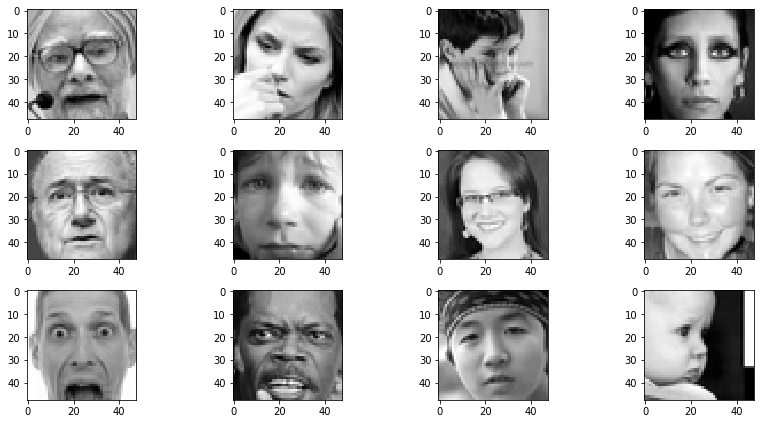

In [16]:
import seaborn as sns
plt.figure(0,figsize=(12,6))
for i in range(1,13):
    plt.subplot(3,4,i)
    plt.imshow(x_train[i,:,:,0],cmap='gray')

plt.tight_layout()
plt.show()

## 모델만들기

In [14]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

In [17]:
def buildModel(width, height, depth):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		chanDim = -1
		# CONV => RELU => POOL
		model.add(Conv2D(64, 3, data_format="channels_last", kernel_initializer="he_normal", 
                 input_shape=(48, 48, 1)))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(3, 3)))
		model.add(Dropout(0.25))

		# (CONV => RELU) * 2 => POOL
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# (CONV => RELU) * 2 => POOL
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(1024))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.25))

		# softmax classifier
		model.add(Dense(7))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model


In [18]:
# batch size, and image dimensions
EPOCHS = 100
INIT_LR = 1e-3  #learning rate
BS = 32  #BATCH SIZE


In [20]:
model = buildModel(width = 48 , height = 48, depth =1)

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
activation_8 (Activation)    (None, 46, 46, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
activation_9 (Activation)    (None, 15, 15, 64)        0         
__________

In [15]:
from keras.optimizers import Adam

In [24]:
opt = Adam(lr = INIT_LR, decay = INIT_LR/EPOCHS)
model.compile(loss = 'categorical_crossentropy',optimizer = opt,metrics = ['accuracy'])

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [26]:
aug = ImageDataGenerator(rotation_range = 25, width_shift_range =0.1,
                        height_shift_range = 0.1,shear_range=0.2,zoom_range=0.2,
                        horizontal_flip = True,fill_mode = 'nearest')

## 모델돌리기

In [28]:
hist = model.fit_generator(aug.flow(x_train,y_train,batch_size = BS),epochs =EPOCHS,
                          shuffle = True,steps_per_epoch = len(x_train)// BS,
                          validation_data =(x_val,y_val),
                          verbose =1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
897/897 [==============================] - 330s 368ms/step - loss: 2.0318 - acc: 0.2560 - val_loss: 2.1565 - val_acc: 0.3430
Epoch 2/100
897/897 [==============================] - 373s 416ms/step - loss: 1.7329 - acc: 0.3504 - val_loss: 1.8972 - val_acc: 0.4179
Epoch 3/100
897/897 [==============================] - 352s 392ms/step - loss: 1.5806 - acc: 0.4126 - val_loss: 1.7811 - val_acc: 0.4494
Epoch 4/100
897/897 [==============================] - 321s 358ms/step - loss: 1.5065 - acc: 0.4408 - val_loss: 1.4719 - val_acc: 0.4882
Epoch 5/100
897/897 [==============================] - 311s 346ms/step - loss: 1.4388 - acc: 0.4612 - val_loss: 1.4546 - val_acc: 0.5110
Epoch 6/100
897/897 [==============================] - 311s 347ms/step - loss: 1.4036 - acc: 0.4774 - val_loss: 1.3188 - val_acc: 0.5322
Epoch 7/100
897/897 [==============================] - 374s 417ms/step - loss: 1.364

897/897 [==============================] - 493s 550ms/step - loss: 1.0147 - acc: 0.6168 - val_loss: 1.0211 - val_acc: 0.6289
Epoch 59/100
897/897 [==============================] - 439s 489ms/step - loss: 1.0116 - acc: 0.6209 - val_loss: 1.0091 - val_acc: 0.6317
Epoch 60/100
897/897 [==============================] - 411s 458ms/step - loss: 1.0129 - acc: 0.6189 - val_loss: 0.9960 - val_acc: 0.6425
Epoch 61/100
897/897 [==============================] - 435s 485ms/step - loss: 0.9999 - acc: 0.6251 - val_loss: 1.0164 - val_acc: 0.6305
Epoch 62/100
897/897 [==============================] - 460s 513ms/step - loss: 1.0032 - acc: 0.6243 - val_loss: 1.0019 - val_acc: 0.6336
Epoch 63/100
897/897 [==============================] - 431s 481ms/step - loss: 0.9996 - acc: 0.6254 - val_loss: 0.9958 - val_acc: 0.6389
Epoch 64/100
897/897 [==============================] - 434s 483ms/step - loss: 0.9965 - acc: 0.6267 - val_loss: 1.0109 - val_acc: 0.6255
Epoch 65/100
897/897 [=========================

## 저장하기

In [30]:
# 모델 저장
model_json = model.to_json()
with open('face_model.json','w') as json_file:
    json_file.write(model_json)

In [32]:
#  WEIGHT 저장
from keras.models import load_model
model.save('fer2013_model.h5')

## 모델로딩


In [27]:
import keras
import json

In [24]:
import tensorflow as tf
tf.reset_default_graph()

In [53]:
with open('face_model.json') as json_file:
    json_config = json_file.read()
new_model = keras.models.model_from_json(json_config)
new_model.load_weights('fer2013_model.h5')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
from keras.models import load_model
model = load_model('fer2013_model.h5')


In [47]:
from keras.preprocessing.image import ImageDataGenerator

In [50]:
df.head

<bound method NDFrame.head of        emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 colum

In [52]:
test = df[['emotion','pixels']][df['Usage']] =='PrivateTest'
test.isnull().sum()

KeyError: "None of [Index(['Training', 'Training', 'Training', 'Training', 'Training', 'Training',\n       'Training', 'Training', 'Training', 'Training',\n       ...\n       'PrivateTest', 'PrivateTest', 'PrivateTest', 'PrivateTest',\n       'PrivateTest', 'PrivateTest', 'PrivateTest', 'PrivateTest',\n       'PrivateTest', 'PrivateTest'],\n      dtype='object', length=35887)] are in the [columns]"

In [48]:
 model.fit(x_testX_train,y_train,batch_size = batch_size ,
          epochs = epochs , verbose =1, validation_data =(X_test,y_test),shuffle = True)


NameError: name 'aug' is not defined

## 시각화

NameError: name 'hist' is not defined

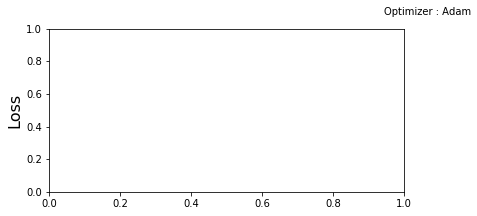

In [44]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
plt.suptitle('Optimizer : Adam',fontsize =10)
plt.ylabel('Loss',fontsize =16)
plt.plot(hist.history['loss'],color = 'b',label = 'Training Loss')
plt.plot(his.history['val_loss'],color = 'r',label = 'Validation Loss')
plt.legend(loc = 'upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize = 16)
plt.plot(hist.history['acc'],color = 'b',label = 'Training Accuracy')
plt.plot(hist.histpry['val_acc'],color = 'r',label = 'Validation Accuracy')

plt.legend(loc = 'lower right')

plt.show()

## 이미지 테스트

- 경로설정 및 파일 설정
-https://wikidocs.net/83


### 파일 생성 및 경로설정

In [ ]:
import os
image_test_path = '경로'
os.mkdir('image_test')  #테스트 폴더 생성

# os.mkdir('test_pretraitement')

In [ ]:
#glob는 파일들의 목록을 뽑을 때 사용하는데, 파일의 경로명을 이용해서 입맛대로 요리할 수 있답니다.

import glob
import cv2 as cv
from keras.preprocessing.image import img_to_array

image_test = 'image_test'

# test_pretraitement = 'test_pretraitement'

[CascadeClassifier]

#https://m.blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220699662173&proxyReferer=https%3A%2F%2Fwww.google.com%2F

### 사이즈 , 색상 변경


- vision API 사용한 사이ㅡ : https://bcho.tistory.com/1179

In [ ]:
data_test = {}
labels_test = {}
#CascadeClassifier (다단계 분류)`
face_cascade = cv.CascadeClassifier('../input/haarcascade/haarcascade_frontalface_default.xml')
i = 0
for img in glob.glob(image_test_path+'/*.jpg'):
    image = cv.imread(img)
    name  = img.split('/')[-1]
    
    gray_image =cv.cvtColor(image,cv.COLOR_BGR2GRAY) #c0nvert to grey
    height,width = image.shape[:2]
    faces =face_cascade.detecMultiScale(gray_image,1.3,1)
    if isinstance(faces,tuple):
        resized_image=cv.resize(gray_image(48,48))
        cv.imwrite(image_test_path+'/'+name,resized_image)
        #print 
    elif isinstance(faces,np.ndarray):
        for(x,y,w,h) in faces:
            if w*h <(height * width)/3 :
                resized_image =cv.resize(gray_image,(48,48))
                cv.imwrite(image_test_path+'/'+name,resized_image)
            else:
                #cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
                roi_gray = gray_image[y:y+h,x:x+w]
                #print(len(roi_gray))
                resized_image = cv.resize(roi_gray,(48,48))
                cv.imwrite(image_test_path+'/'+name.resized_image)
    image = resized_image.astype('float')/255.0
    image = img_to_array(image)
    image = np.expand_dims(image,axis =0)
    data_test[name] = image

In [ ]:
data_predict ={}
for key,value in data_test.items():
    predict = model.predict(value)
    idx = np.argmax(predict)
    data_predict[key] =idx
    
print(idx)

In [ ]:
final_data = pd.DataFrame(list(data_predict.items()),
                         columns =['Image','Emotion'])

In [ ]:
final_data.to.csv('result.csv')

In [ ]:
# fd = io.open(imagefile,'rb')

# image = Image.open(fd)

 

# import matplotlib.pyplot as plt

# # display original image

# print "Original image"

# plt.imshow(image)

# plt.show()



# 출처: https://bcho.tistory.com/1179 [조대협의 블로그]

### 활용하기

In [ ]:
#이미지 불러오기
image_path = blah
img = image.load_imag(imga_path,target_size =(48,48))
xhat = image.img_to_array(img)
xhat =np.expand_dims(xhat,axis =0)
xhat = preprocess_input(xhat)
                
 #임의의 이미지로 예측
yhat=model.predict(xhat)


#결과확인
P = imagenet_utils.decode_predictions(yhat)

for(i,(imagenetID,label,prob)) in enumerate(P[0]):
    print("{}.{}:{:.2f}%".format(i+1,label,prob*100))

In [ ]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) #>> 넘파이 출력옵션 변경하는것! (소수점3자리까지)
cnt = 0
for i in prediction2:
    pre_ans = i.argmax()  # 예측 레이블  # argmax : 함수를 최대로 만들기 위한 x 값 --> 즉 첫번째에서는 3번째만 1이므로 2가 출력됨
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "캔"
    elif pre_ans == 1: pre_ans_str = "플라스틱"
    elif pre_ans == 2: pre_ans_str = "유리"
    else: pre_ans_str = "스티로품"
    if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    cnt += 1

# KDEF

- https://www.slideshare.net/WonjuSeo/facial-emotion-recognition-with-keras

- https://github.com/Wonjuseo/Facial_Expression
- https://github.com/Wonjuseo/Facial_Expression/blob/master/FER/data_load.py

When I tried lots of tests,
1. Smooth labels improved greatly accuracy.(rather than one-hot labels - argmax(emotions))
2. When parameteric ReLU was used, AveragePooling showed better results than when maxpooling was used
3. To avert over-fitting problems, I used 
  1. Data augmentation (Image augmentation)
  2. Add Gausssian noise
  3. Global Average Pooling layer, rather than Flatten
  4. Dropout layers with 0.2



## 데이터 convert

- https://antilibrary.org/1980
- https://keras.io/ko/getting-started/sequential-model-guide/
- https://github.com/Rakshith-2905/Face-Recognition/blob/master/README.md


- 
- afraid
- anger
- disgusted
- happy
- neutral
- sad
- surprised

1. 이미지 불러오기
2. 이미지 흑백지정, 사이즈 지정 / 변환
3. train val test 나누기
4. grid search 


In [4]:
import glob
import numpy as np , pandas as pd
import os 
from scipy import misc
import shutil
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout,Flatten,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [15]:
# len(os.listdir(afraid_dir))
# len(os.listdir(anger_dir))
len(os.listdir(disgusted_dir))
# len(os.listdir(happy_dir))
# len(os.listdir(neutral_dir))
# len(os.listdir(sad_dir))
# len(os.listdir(surprised_dir))

694

In [24]:
image_path = list(os.listdir('./emotion/'))
afraid= list(os.listdir("./emotion/afraid/"))
anger = list(os.listdir("./emotion/anger/"))
disgusted = list(os.listdir("./emotion/disgusted/"))
happy = list(os.listdir("./emotion/happy/"))
neutral = list(os.listdir("./emotion/neutral"))
sad = list(os.listdir("./emotion/sad"))
surprised = list(os.listdir("./emotion/surprised"))

In [ ]:
data_test = {}
labels_test = {}
#CascadeClassifier (다단계 분류)`
face_cascade = cv.CascadeClassifier('../input/haarcascade/haarcascade_frontalface_default.xml')
i = 0
for img in glob.glob(image_test_path+'/*.jpg'):
    image = cv.imread(img)
    name  = img.split('/')[-1]
    
    gray_image =cv.cvtColor(image,cv.COLOR_BGR2GRAY) #c0nvert to grey
    height,width = image.shape[:2]
    faces =face_cascade.detecMultiScale(gray_image,1.3,1)
    if isinstance(faces,tuple):
        resized_image=cv.resize(gray_image(48,48))
        cv.imwrite(image_test_path+'/'+name,resized_image)
        #print 
    elif isinstance(faces,np.ndarray):
        for(x,y,w,h) in faces:
            if w*h <(height * width)/3 :
                resized_image =cv.resize(gray_image,(48,48))
                cv.imwrite(image_test_path+'/'+name,resized_image)
            else:
                #cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
                roi_gray = gray_image[y:y+h,x:x+w]
                #print(len(roi_gray))
                resized_image = cv.resize(roi_gray,(48,48))
                cv.imwrite(image_test_path+'/'+name.resized_image)
    image = resized_image.astype('float')/255.0
    image = img_to_array(image)
    image = np.expand_dims(image,axis =0)
    data_test[name] = image

In [42]:
import cv2

In [50]:
afraid_dir = './emotion/afraid'


for img in glob.glob(afraid_dir+'/*.JPG'):
    image =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
plt.show(1,2)
plt.imshow(image)

TypeError: Expected Ptr<cv::UMat> for argument 'src'

In [ ]:
image_path = list(os.listdir('./emotion/'))
afraid= list(os.listdir("./emotion/afraid/"))
anger = list(os.listdir("./emotion/anger/"))
disgusted = list(os.listdir("./emotion/disgusted/"))
happy = list(os.listdir("./emotion/happy/"))
neutral = list(os.listdir("./emotion/neutral"))
sad = list(os.listdir("./emotion/sad"))
surprised = list(os.listdir("./emotion/surprised"))

In [ ]:
a = glob.glob(afraid_dir)

In [38]:

afraid = cv2.cvtColor(afraid_dir,cv2.COLOR_BGR2GRAY)

TypeError: Expected Ptr<cv::UMat> for argument 'src'